---
# Esercitazione 5
---
## Esercizio 05.1 - Atomo di idrogeno
In questa esercitazione si vuole utilizzare l'algoritmo di Metropolis per campionare la densità di probabilità dell'elettrone di un atomo d'idrogeno. L'autofunzione d'onda di questo elettrone nel livello fondamentale (Ground State) è data da:

$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$

Mentre per uno dei tre stati eccitati nel livello $2p$ vale:

$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$ 

dove $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm è il raggio di Bohr. L'obiettivo è verificare che: $\\$
$\bullet \left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0 $ $\\$  
$\bullet \left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$

dove le rispettive densità di probabilità sono date da $|\Psi_{1,0,0}(x,y,z)|^2$ e $|\Psi_{2,1,0}(x,y,z)|^2$.
L'esercizio è diviso in due punti, ognuno riguarda un utilizzo differente dell'algoritmo di Metropolis. Ogni analisi è effettuata svolgendo $10^6$ simulazioni.

### Primo punto - Probabilità di Transizione uniforme
Nel primo punto si utilizza una probabilità di transizione  $T(\vec{x}|\vec{y})$ tra due posizioni successive $\vec{x},\vec{y}$ uniforme. La posizione iniziale utilizzata nell'algoritmo è scelta in modo che massimizzi la densità di probabilità, in modo da aumentarne il campionamento. Per lo stato GS si utilizza quindi $(x,y,z)=(0,0,0)$, mentre per lo stato $2p$ si utilizza $(x,y,z)=(0,0,1)$, in quanto si ha che $\cos(\theta)=z/r$ e il massimo si ha per $r=z^2 \rightarrow z=1$ se $x=y=0$. $\\$

La probabilità di transizione qui utilizzata è dunque uniforme tra $[\vec{r}_{old}-\vec{\delta} ; \vec{r}_{old}+\vec{\delta}]$, dove $\vec{\delta}=\delta \cdot [1,1,1]$ è un parametro fissato che permette di ottenere un valore di accettazione nell'algoritmo di Metropolis pari a circa il $50\%$. Nei due casi di funzione d'onda GS e $2p$ i valori trovati per $\delta$ sono rispettivamente $1.223$ e $2.980$. $\vec{r}_{old}=[x_{old}, y_{old}, z_{old}]$ è la posizione spaziale allo step precedente. Di seguito vengono riportate le distribuzioni delle accettazioni per il caso GS e $2p$.

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori di accettazione nei due casi, con transizione uniforme
acc_gs, err_acc_gs = np.loadtxt("./dati_unif/Accettazioni_gs_unif.txt", unpack= True, usecols=(0,1), skiprows=1)
acc_2p, err_acc_2p = np.loadtxt("./dati_unif/Accettazioni_2p_unif.txt", unpack= True, usecols=(0,1), skiprows=1)

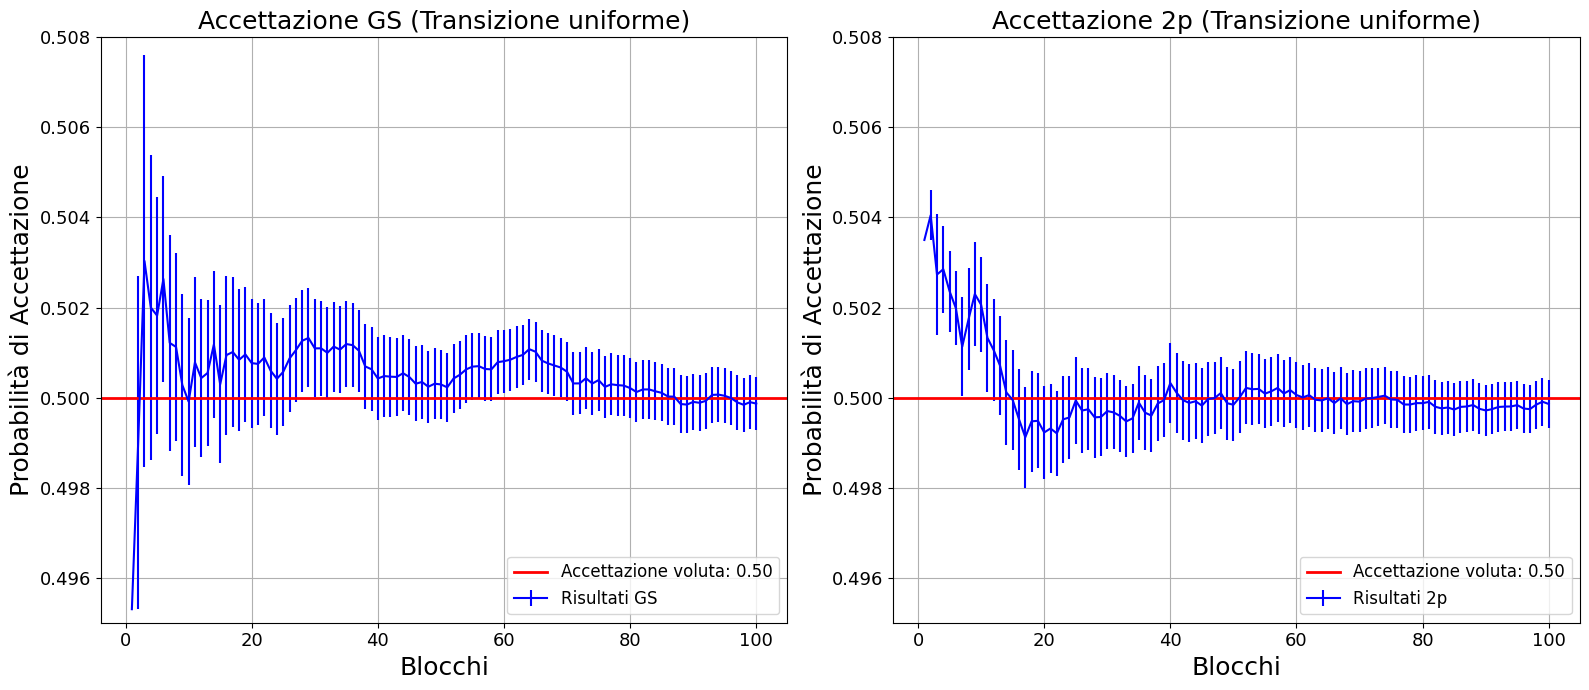

Valor medio Accettazione GS (Transizione uniforme):  0.4999 +\- 0.0006
Livello di confidenza con il valore atteso:  0.22 sigma


Valor medio Accettazione 2p (Transizione uniforme):  0.4999 +\- 0.0005
Livello di confidenza con il valore atteso:  0.27 sigma


In [20]:
N_blocks = len(acc_gs) # numero blocchi

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(1, N_blocks+1)     # numero blocchi

plt.figure(figsize=(16,7))

##################################
# Plot delle due accettazioni
plt.subplot(1,2,1)
plt.ylim(0.495, 0.508)
plt.title(r"Accettazione GS (Transizione uniforme)", fontsize=18)
plt.errorbar(x, acc_gs, yerr=err_acc_gs, label = "Risultati GS", color = 'blue') #plotto la media cumulativa dell'accettazione
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"Probabilità di Accettazione", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=0.5, xmin=0, xmax=1, label=f'Accettazione voluta: 0.50', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
plt.subplot(1,2,2)
plt.ylim(0.495, 0.508)
plt.title(r"Accettazione 2p (Transizione uniforme)", fontsize=18)
plt.errorbar(x, acc_2p, yerr=err_acc_2p, label = "Risultati 2p", color = 'blue')
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"Probabilità di Accettazione", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=0.5, xmin=0, xmax=1, label=f'Accettazione voluta: 0.50', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

print("Valor medio Accettazione GS (Transizione uniforme): ", round(acc_gs[-1],4), "+\-", round(err_acc_gs[-1],4))
print("Livello di confidenza con il valore atteso: ",np.abs(round((acc_gs[-1] - 0.5)/err_acc_gs[-1],2)), "sigma")
print("\n")

print("Valor medio Accettazione 2p (Transizione uniforme): ", round(acc_2p[-1],4), "+\-", round(err_acc_2p[-1],4))
print("Livello di confidenza con il valore atteso: ",np.abs(round((acc_2p[-1] - 0.5)/err_acc_2p[-1],2)), "sigma")


Di seguito vengono riportati i valor medi delle posizioni $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ ottenuti, in unità di raggio di Bohr.

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori delle medie cumulative delle posizioni
pos_gs, err_pos_gs = np.loadtxt("./dati_unif/Posizioni_gs_unif.txt", unpack= True, usecols=(0,1), skiprows=1)
pos_2p, err_pos_2p = np.loadtxt("./dati_unif/Posizioni_2p_unif.txt", unpack= True, usecols=(0,1), skiprows=1)

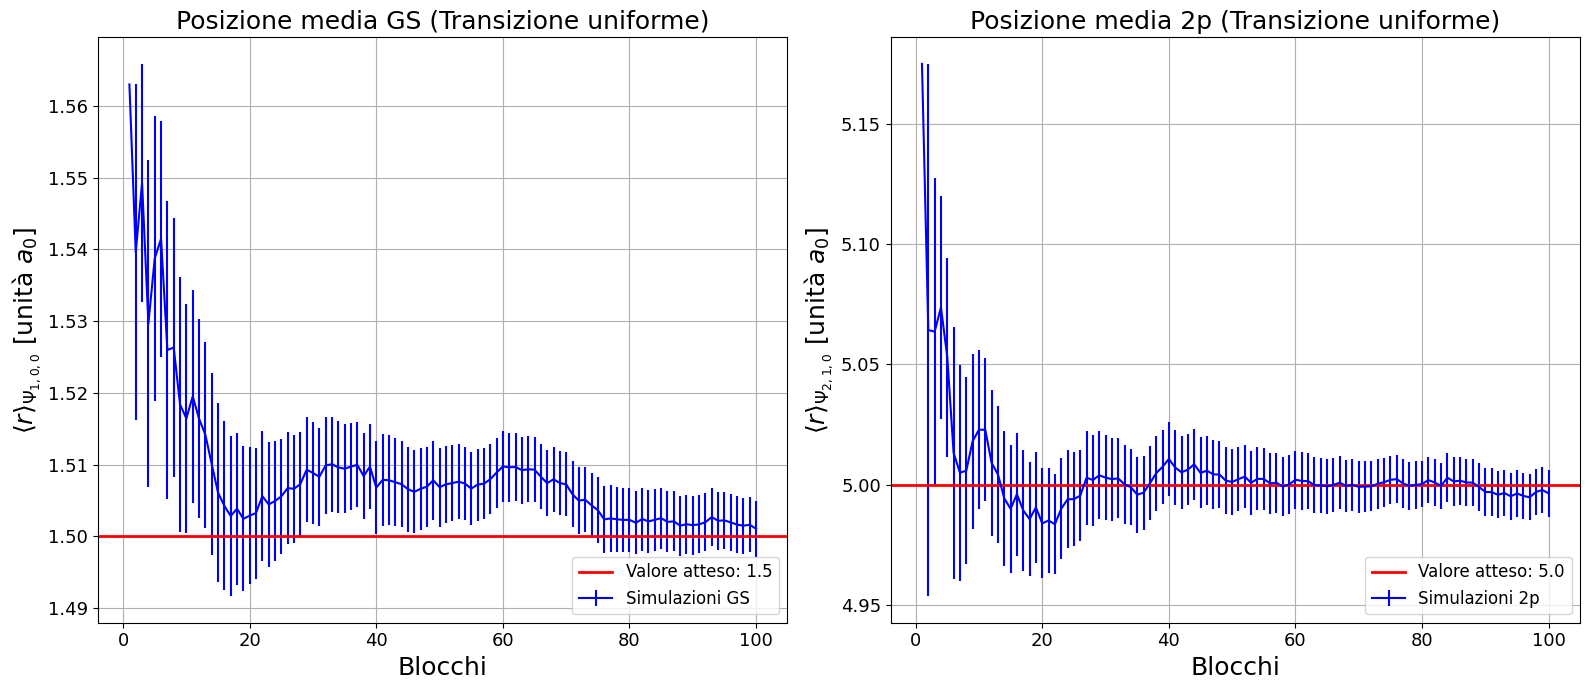

Posizione media GS (Transizione uniforme):  1.501 +\- 0.004
Livello di confidenza con il valore atteso:  0.27 sigma


Posizione media 2p (Transizione uniforme):  4.996 +\- 0.01
Livello di confidenza con il valore atteso:  0.37 sigma


In [22]:
N_blocks = len(pos_gs) # numero blocchi

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(1, N_blocks+1)     # numero blocchi

plt.figure(figsize=(16,7))

##################################
# Plot delle due accettazioni
plt.subplot(1,2,1)
plt.title(r"Posizione media GS (Transizione uniforme)", fontsize=18)
plt.errorbar(x, pos_gs, yerr=err_pos_gs, label = "Simulazioni GS", color = 'blue') #plotto la media cumulativa dell'accettazione
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=1.5, xmin=0, xmax=1, label=f'Valore atteso: 1.5', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
plt.subplot(1,2,2)
plt.title(r"Posizione media 2p (Transizione uniforme)", fontsize=18)
plt.errorbar(x, pos_2p, yerr=err_pos_2p, label = "Simulazioni 2p", color = 'blue')
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=5., xmin=0, xmax=1, label=f'Valore atteso: 5.0', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

print("Posizione media GS (Transizione uniforme): ", round(pos_gs[-1],3), "+\-", round(err_pos_gs[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_gs[-1] - 1.5)/err_pos_gs[-1],2)), "sigma")
print("\n")

print("Posizione media 2p (Transizione uniforme): ", round(pos_2p[-1],3), "+\-", round(err_pos_2p[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_2p[-1] - 5.)/err_pos_2p[-1],2)), "sigma")

Per mostrare l'importanza della posizione iniziale dell'algoritmo, di seguito vengono riportati i risultati ottenuti partendo da una posizione molto distante: $[0,0,1000]$ per entrambi i casi.

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori di accettazione nei due casi, con transizione uniforme
acc_gs, err_acc_gs = np.loadtxt("./dati_unif/Accettazioni_gs_unif_1k.txt", unpack= True, usecols=(0,1), skiprows=1)
acc_2p, err_acc_2p = np.loadtxt("./dati_unif/Accettazioni_2p_unif_1k.txt", unpack= True, usecols=(0,1), skiprows=1)

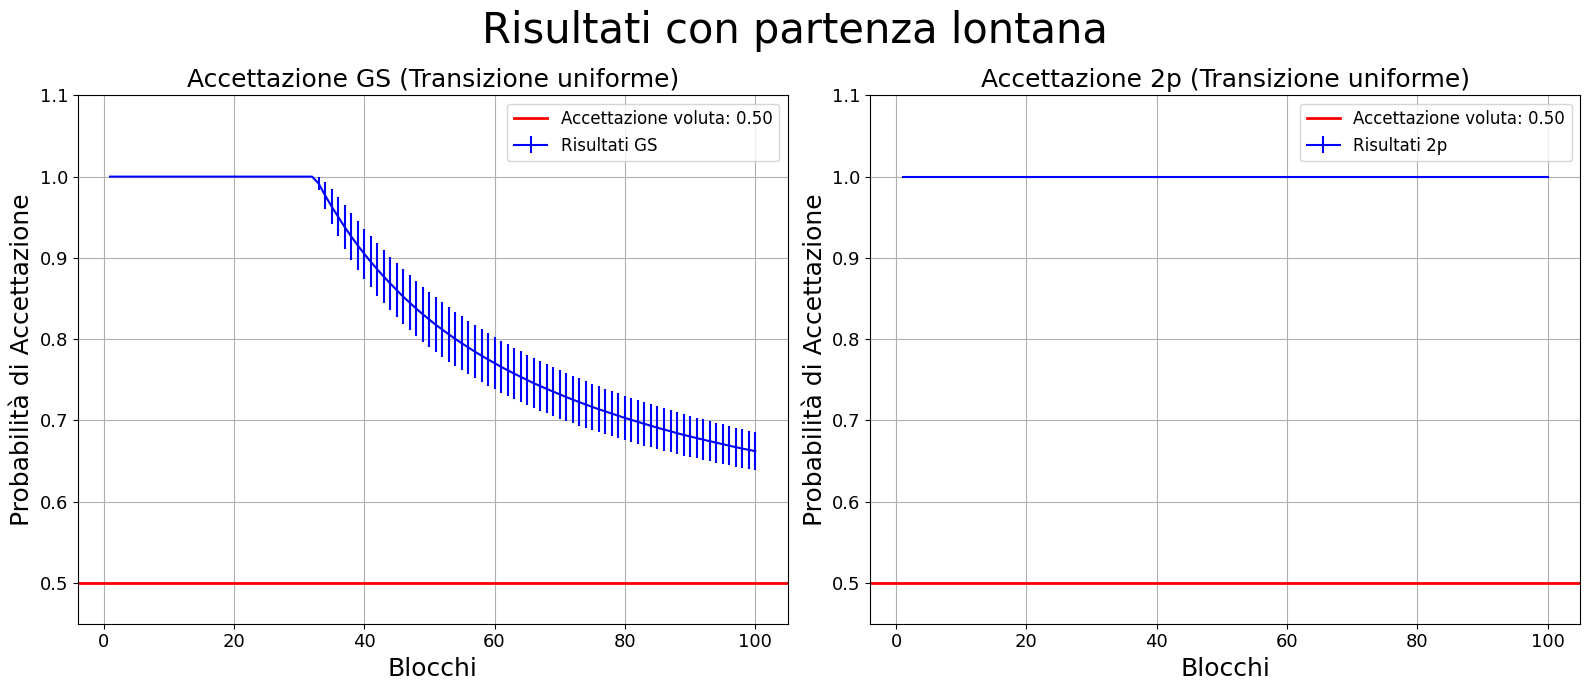

Valor medio Accettazione GS (Transizione uniforme):  0.6622 +\- 0.0234
Livello di confidenza con il valore atteso:  6.93 sigma


Valor medio Accettazione 2p (Transizione uniforme):  1.0 +\- 0.0
Livello di confidenza con il valore atteso:  inf sigma


C:\Users\teote\AppData\Local\Temp\ipykernel_8384\2028799415.py:47: RuntimeWarning: divide by zero encountered in scalar divide
  print("Livello di confidenza con il valore atteso: ",np.abs(round((acc_2p[-1] - 0.5)/err_acc_2p[-1],2)), "sigma")


In [29]:
N_blocks = len(acc_gs) # numero blocchi

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(1, N_blocks+1)     # numero blocchi

plt.figure(figsize=(16,7))
plt.suptitle(r"Risultati con partenza lontana", fontsize = 30)

##################################
# Plot delle due accettazioni
plt.subplot(1,2,1)
plt.ylim(0.45, 1.1)
plt.title(r"Accettazione GS (Transizione uniforme)", fontsize=18)
plt.errorbar(x, acc_gs, yerr=err_acc_gs, label = "Risultati GS", color = 'blue') #plotto la media cumulativa dell'accettazione
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"Probabilità di Accettazione", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=0.5, xmin=0, xmax=1, label=f'Accettazione voluta: 0.50', lw = 2, color = 'red')
plt.legend(loc='upper right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
plt.subplot(1,2,2)
plt.ylim(0.45, 1.1)
plt.title(r"Accettazione 2p (Transizione uniforme)", fontsize=18)
plt.errorbar(x, acc_2p, yerr=err_acc_2p, label = "Risultati 2p", color = 'blue')
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"Probabilità di Accettazione", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=0.5, xmin=0, xmax=1, label=f'Accettazione voluta: 0.50', lw = 2, color = 'red')
plt.legend(loc='upper right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

print("Valor medio Accettazione GS (Transizione uniforme): ", round(acc_gs[-1],4), "+\-", round(err_acc_gs[-1],4))
print("Livello di confidenza con il valore atteso: ",np.abs(round((acc_gs[-1] - 0.5)/err_acc_gs[-1],2)), "sigma")
print("\n")

print("Valor medio Accettazione 2p (Transizione uniforme): ", round(acc_2p[-1],4), "+\-", round(err_acc_2p[-1],4))
print("Livello di confidenza con il valore atteso: ",np.abs(round((acc_2p[-1] - 0.5)/err_acc_2p[-1],2)), "sigma")


In questo caso si nota come il sistema impieghi molti più step per raggiungere il valore desiderato di accettazione al $50%$; nel caso di stato eccitato vengono invece accettati tutti i valori per ogni step. La posizione media raggiunta nei due casi è riportata di seguito.

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori delle medie cumulative delle posizioni
pos_gs, err_pos_gs = np.loadtxt("./dati_unif/Posizioni_gs_unif_1k.txt", unpack= True, usecols=(0,1), skiprows=1)
pos_2p, err_pos_2p = np.loadtxt("./dati_unif/Posizioni_2p_unif_1k.txt", unpack= True, usecols=(0,1), skiprows=1)

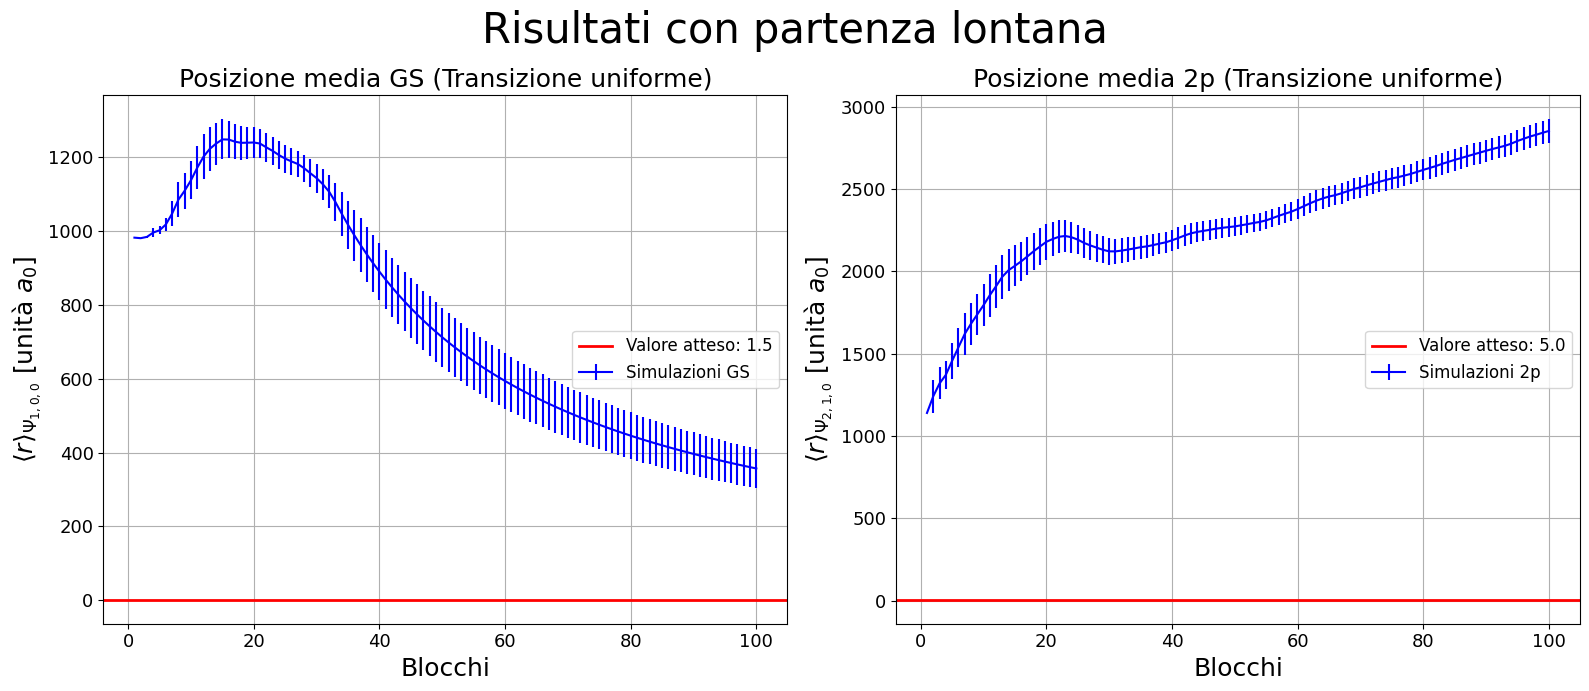

Posizione media GS (Transizione uniforme):  356.761 +\- 53.601
Livello di confidenza con il valore atteso:  6.63 sigma


Posizione media 2p (Transizione uniforme):  2852.01 +\- 70.399
Livello di confidenza con il valore atteso:  40.44 sigma


In [32]:
N_blocks = len(pos_gs) # numero blocchi

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(1, N_blocks+1)     # numero blocchi

plt.figure(figsize=(16,7))
plt.suptitle(r"Risultati con partenza lontana", fontsize = 30)

##################################
# Plot delle due accettazioni
plt.subplot(1,2,1)
plt.title(r"Posizione media GS (Transizione uniforme)", fontsize=18)
plt.errorbar(x, pos_gs, yerr=err_pos_gs, label = "Simulazioni GS", color = 'blue') #plotto la media cumulativa dell'accettazione
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=1.5, xmin=0, xmax=1, label=f'Valore atteso: 1.5', lw = 2, color = 'red')
plt.legend(loc='right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
plt.subplot(1,2,2)
plt.title(r"Posizione media 2p (Transizione uniforme)", fontsize=18)
plt.errorbar(x, pos_2p, yerr=err_pos_2p, label = "Simulazioni 2p", color = 'blue')
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=5., xmin=0, xmax=1, label=f'Valore atteso: 5.0', lw = 2, color = 'red')
plt.legend(loc='right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

print("Posizione media GS (Transizione uniforme): ", round(pos_gs[-1],3), "+\-", round(err_pos_gs[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_gs[-1] - 1.5)/err_pos_gs[-1],2)), "sigma")
print("\n")

print("Posizione media 2p (Transizione uniforme): ", round(pos_2p[-1],3), "+\-", round(err_pos_2p[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_2p[-1] - 5.)/err_pos_2p[-1],2)), "sigma")

Si noti come del caso eccitato la distanza media tenda a divergere al crescere degli step, il sistema si sta allontanando dall'equilibrio. Questi risultati confermano l'importanza della scelta del valore iniziale dell'algoritmo di Metropolis, come del valore di $\delta$ adatto da utilizzare.

### Secondo punto - Probabilità di Transizione gaussiana
Nel secondo punto si utilizza una probabilità di transizione $T(\vec{x}|\vec{y})$ tra due posizioni successive $\vec{x},\vec{y}$ gaussiana. La posizione campionata allo step successivo è ottenuta estraendo tre coordinate $x, y, z$ distribuite ognuna secondo una gaussiana, centrata nel valore della coordinata allo step precedente e con una varianza pari a $\delta^2$. Anche in questo caso il valore di $\delta$ è scelto in modo da rendere l'accettazione il più vicina possibile al $50\%$. Per le due funzioni d'onda GS e $2p$ i valori trovati per $\delta$ sono rispettivamente $0.873$ e $1.371$, ovvero rispetto al caso uniforme il campionamento dev'essere eseguito con step più brevi (i valori trovati erano infatti rispettivamente $1.223$ e $2.980$). La posizione iniziale utilizzata nell'algoritmo è analoga a quella utilizata in precedenza. $\\$

Di seguito vengono riportati i risultati dei valori di accettazione per le due funzioni d'onda.

cosa vuol dire portare ad equilibrio prima di misurare r?
io ho campionato 10^6 volte e poi ho fatto la media a blocchi di questi valori, i raggi ottenuti seguono quella distribuzione quindi la media è il valore di aspettazione della posizione in quegli stati.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori di accettazione nei due casi, con transizione uniforme
acc_gs, err_acc_gs = np.loadtxt("./dati_gauss/Accettazioni_gs_gauss.txt", unpack= True, usecols=(0,1), skiprows=1)
acc_2p, err_acc_2p = np.loadtxt("./dati_gauss/Accettazioni_2p_gauss.txt", unpack= True, usecols=(0,1), skiprows=1)

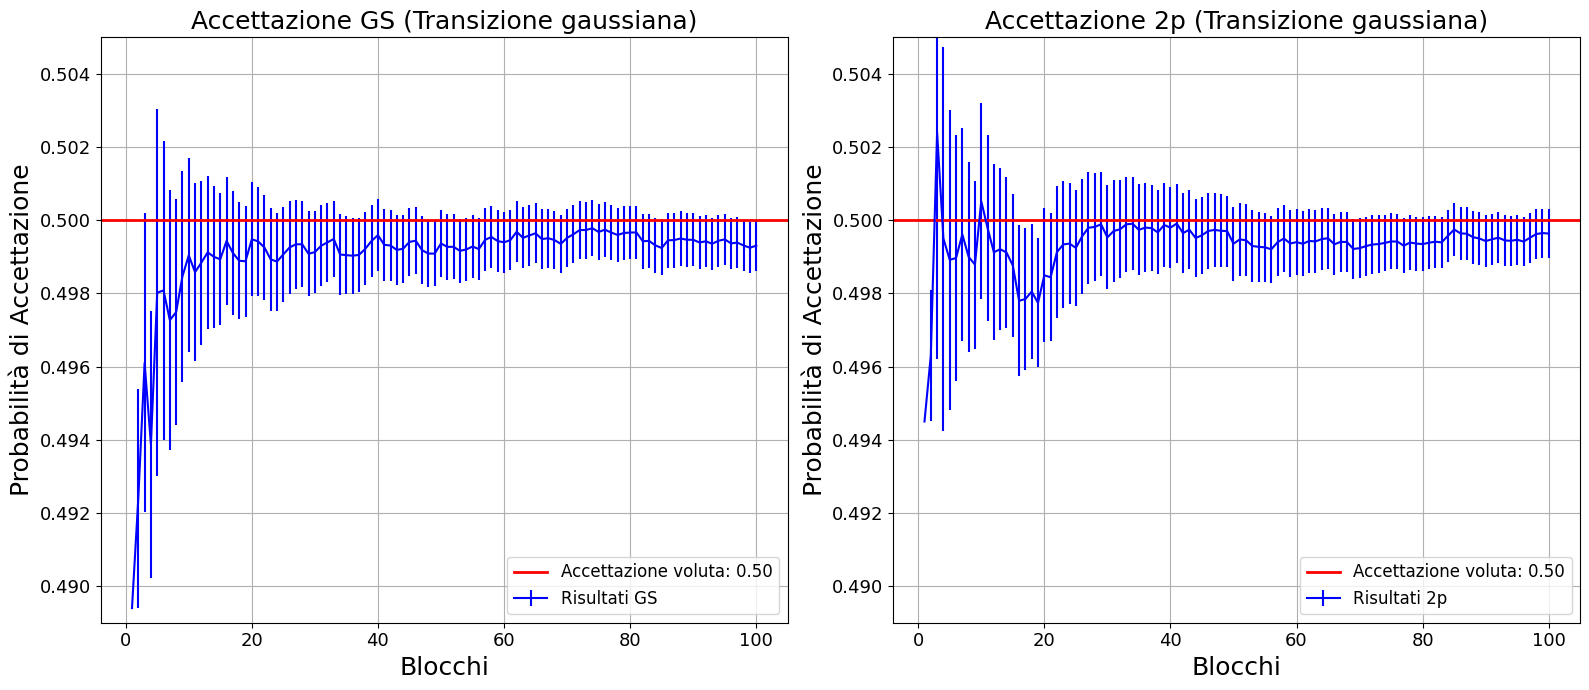

Valor medio Accettazione GS (Transizione gaussiana):  0.4993 +\- 0.0007
Livello di confidenza con il valore atteso:  1.01 sigma


Valor medio Accettazione 2p (Transizione gaussiana):  0.4996 +\- 0.0007
Livello di confidenza con il valore atteso:  0.55 sigma


In [12]:
N_blocks = len(acc_gs) # numero blocchi

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(1, N_blocks+1)     # numero blocchi

plt.figure(figsize=(16,7))

##################################
# Plot delle due accettazioni
plt.subplot(1,2,1)
plt.ylim(0.489, 0.505)
plt.title(r"Accettazione GS (Transizione gaussiana)", fontsize=18)
plt.errorbar(x, acc_gs, yerr=err_acc_gs, label = "Risultati GS", color = 'blue') #plotto la media cumulativa dell'accettazione
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"Probabilità di Accettazione", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=0.5, xmin=0, xmax=1, label=f'Accettazione voluta: 0.50', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
plt.subplot(1,2,2)
plt.ylim(0.489, 0.505)
plt.title(r"Accettazione 2p (Transizione gaussiana)", fontsize=18)
plt.errorbar(x, acc_2p, yerr=err_acc_2p, label = "Risultati 2p", color = 'blue')
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"Probabilità di Accettazione", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=0.5, xmin=0, xmax=1, label=f'Accettazione voluta: 0.50', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

print("Valor medio Accettazione GS (Transizione gaussiana): ", round(acc_gs[-1],4), "+\-", round(err_acc_gs[-1],4))
print("Livello di confidenza con il valore atteso: ",np.abs(round((acc_gs[-1] - 0.5)/err_acc_gs[-1],2)), "sigma")
print("\n")

print("Valor medio Accettazione 2p (Transizione gaussiana): ", round(acc_2p[-1],4), "+\-", round(err_acc_2p[-1],4))
print("Livello di confidenza con il valore atteso: ",np.abs(round((acc_2p[-1] - 0.5)/err_acc_2p[-1],2)), "sigma")


Rispetto al caso di campionamento uniforme, questo caso sembra convergere più rapidamente. $\\$
Di seguito vengono riportati i valor medi delle posizioni $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ ottenuti, in unità di raggio di Bohr.

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori delle medie cumulative delle posizioni
pos_gs, err_pos_gs = np.loadtxt("./dati_gauss/Posizioni_gs_gauss.txt", unpack= True, usecols=(0,1), skiprows=1)
pos_2p, err_pos_2p = np.loadtxt("./dati_gauss/Posizioni_2p_gauss.txt", unpack= True, usecols=(0,1), skiprows=1)

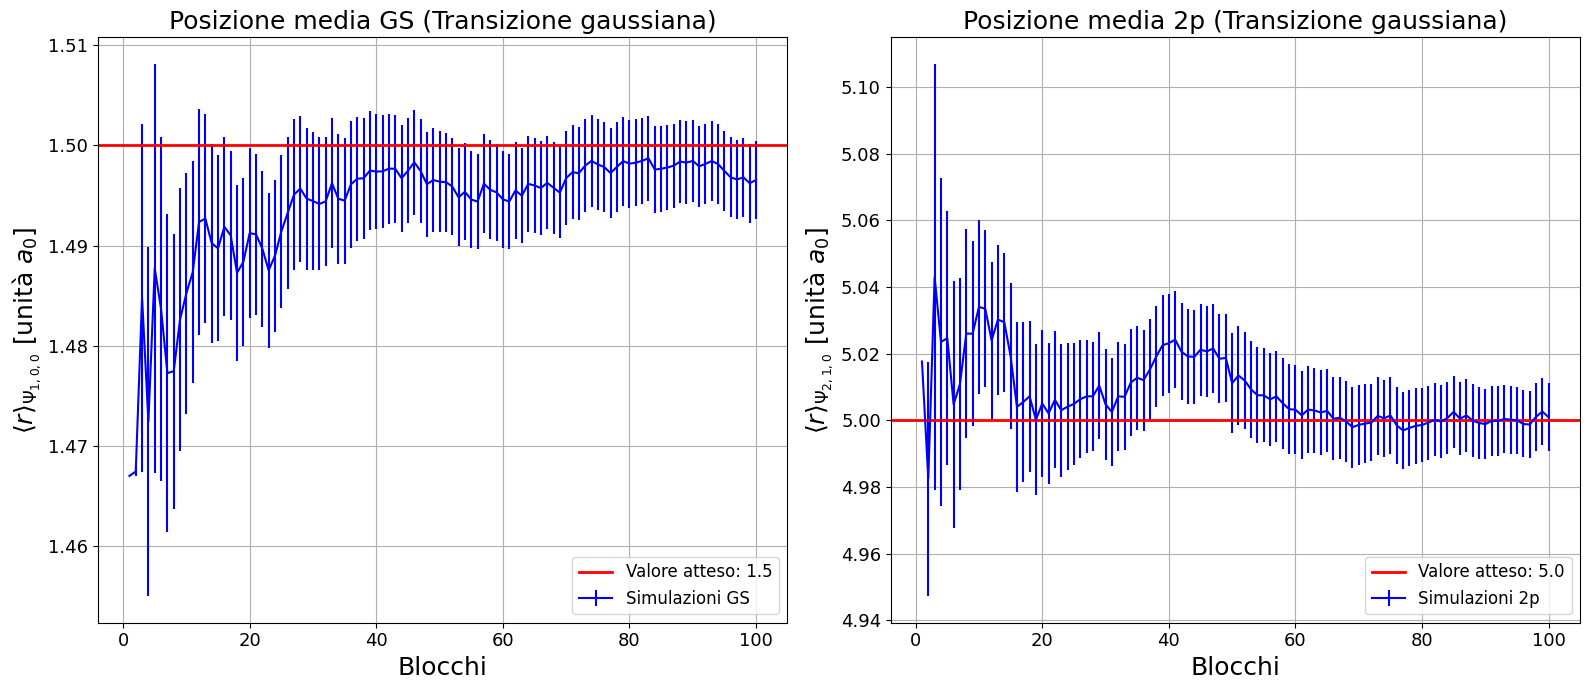

Posizione media GS (Transizione uniforme):  1.497 +\- 0.004
Livello di confidenza con il valore atteso:  0.88 sigma


Posizione media 2p (Transizione uniforme):  5.001 +\- 0.01
Livello di confidenza con il valore atteso:  0.09 sigma


In [15]:
N_blocks = len(pos_gs) # numero blocchi

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(1, N_blocks+1)     # numero blocchi

plt.figure(figsize=(16,7))

##################################
# Plot delle due accettazioni
plt.subplot(1,2,1)
plt.title(r"Posizione media GS (Transizione gaussiana)", fontsize=18)
plt.errorbar(x, pos_gs, yerr=err_pos_gs, label = "Simulazioni GS", color = 'blue') #plotto la media cumulativa dell'accettazione
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=1.5, xmin=0, xmax=1, label=f'Valore atteso: 1.5', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
plt.subplot(1,2,2)
plt.title(r"Posizione media 2p (Transizione gaussiana)", fontsize=18)
plt.errorbar(x, pos_2p, yerr=err_pos_2p, label = "Simulazioni 2p", color = 'blue')
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=5., xmin=0, xmax=1, label=f'Valore atteso: 5.0', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

print("Posizione media GS (Transizione uniforme): ", round(pos_gs[-1],3), "+\-", round(err_pos_gs[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_gs[-1] - 1.5)/err_pos_gs[-1],2)), "sigma")
print("\n")

print("Posizione media 2p (Transizione uniforme): ", round(pos_2p[-1],3), "+\-", round(err_pos_2p[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_2p[-1] - 5.)/err_pos_2p[-1],2)), "sigma")

Si può notare che anche nel caso di campionamento gaussiano il valor medio delle posizioni stimato è compatibile con il valore atteso.  $\\$

Di seguito viene riportato un plot 3D di $10000$ posizioni campionate a partire dalla funzione d'onda dello stato eccitato $2p$, con una gradazione di colore in base alla distanza dal centro.

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# carico i valori delle medie cumulative delle posizioni
X, Y, Z = np.loadtxt("./Posizioni_2p.txt", unpack= True, usecols=(0,1,2), skiprows=0)

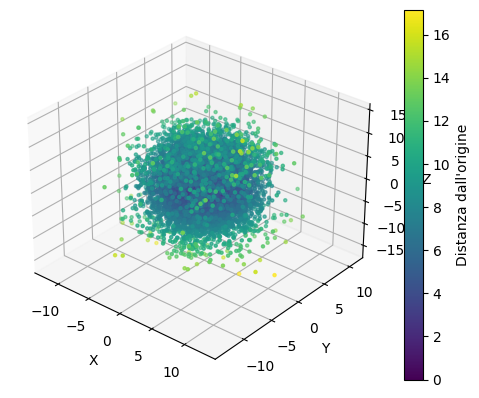

In [67]:
# Calcola la distanza dall'origine per ogni punto
distances = np.sqrt(X**2 + Y**2 + Z**2)

# Crea una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotta i punti
sc = ax.scatter(X, Y, Z, c=distances, cmap='viridis', marker='.')

# Etichette degli assi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Aggiungi una barra del colore per mostrare la scala delle distanze
cbar = fig.colorbar(sc)
cbar.set_label('Distanza dall\'origine')

# Inclina la visuale di 30 gradi sull'asse z
ax.view_init(elev=30, azim=-50)

# Mostra il grafico
plt.show()


Per mostrare meglio la distribuzione creatasi, di seguito viene creato un video nella quale l'orientazione della camera cambia, permettendo di avere una visuale 3D del cluster di posizioni. Si può notare meglio che le posizioni sono accumulate maggiormente ai lobi sull'asse $z$ del cluster; infatti, al centro sono più visibili posizioni di colore blu, ovvero vicine all'origine, e se sono visibili è perché la densità di posizioni più esterne che le coprono è inferiore.

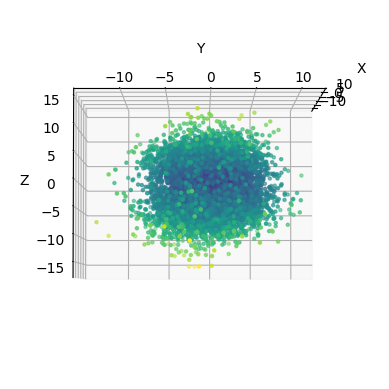

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Funzione per creare il grafico 3D
def create_3d_plot(X, Y, Z, dist):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, c=dist, cmap='viridis', marker='.')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    return fig, ax

# Calcola la distanza dall'origine per ogni punto
distances = np.sqrt(X**2 + Y**2 + Z**2)

# Crea il grafico 3D iniziale
fig, ax = create_3d_plot(X, Y, Z, distances)

# Aggiungi una barra del colore per mostrare la scala delle distanze
cbar = fig.colorbar(sc)
cbar.set_label('Distanza dall\'origine')

# Parametri per la rotazione della camera
elevation_steps = 120 
azimuth_steps = 1
frames_per_rotation = 10

# Crea una lista di figure che rappresentano la rotazione della camera
rotation_figures = []
for elev in np.linspace(0, 360, elevation_steps, endpoint=False):
    for azim in np.linspace(0, 360, azimuth_steps, endpoint=False):
        ax.view_init(elev, azim)
        fig.canvas.draw()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        rotation_figures.append(img)

# Crea il video
import imageio
video_filename = 'camera_rotation.mp4'
imageio.mimsave(video_filename, rotation_figures, fps=frames_per_rotation)

# Mostra il grafico 3D iniziale
plt.show()